# Downloading Climate Data from Climate Data Store 

* This notebook was developed to download Climate data that is produced for AR6 report using API from Climate Data Store. https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip6?tab=form

* I added my API key in this GitHub. If you set up the your own API key, please follow the link below.  

    https://confluence.ecmwf.int/display/CKB/How+to+install+and+use+CDS+API+on+Windows
    
    https://cds.climate.copernicus.eu/api-how-to    

In [1]:
# import cdsapi to download climate data using API
import cdsapi

c = cdsapi.Client()

## 1. Download Historical GCM data

### 1.1 Set Temporal Resolution

<img src="../figures/CMIP6_1.PNG" width="1100">

In [2]:
temporal_resolution = "daily"

### 1.2 Set Experiment "Historical"

<img src="../figures/CMIP6_2.PNG" width="1100">

In [3]:
experiment = 'historical'

### 1.3 Set Level

<img src="../figures/CMIP6_3.PNG" width="1100">

In [4]:
level = "single_levels"     

### 1.4 Set Variable (example: precipitation)

<img src="../figures/CMIP6_4.PNG" width="1100">

In [5]:
variable = 'precipitation',

### 1.5 Set Model (example:HadGEM3-GC31-MM(UK))

<img src="../figures/CMIP6_5.PNG" width="1100">

In [6]:
model =  'hadgem3_gc31_mm'

### 1.6 Set Temporal subset

 * if you set "Whole available temporal range", you don't need to set temporal subset in api command.

<img src="../figures/CMIP6_6.PNG" width="1100">

In [7]:
date = '1947-01-01/2014-12-31'

### 7. Set Geographical Area (example: Pakistan - North:26, South:24, West:66, East:68)

<img src="../figures/CMIP6_7.PNG" width="1100">

In [8]:
area = [26, 66, 24, 68, ]

In [9]:
c.retrieve(
    'projections-cmip6',
    {
        'format': 'zip',
        'temporal_resolution': temporal_resolution,
        'experiment': experiment,
        'level': level,
        'variable': variable,
        'model': model,
        'area': area,
        'date': date
    },
    'pakistan_karachi_gcm_historical.zip')

2022-09-01 21:55:15,349 INFO Welcome to the CDS
2022-09-01 21:55:15,400 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cmip6
2022-09-01 21:55:15,708 INFO Request is completed
2022-09-01 21:55:15,709 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data9/adaptor.esgf_wps.retrieve-1662046559.4665616-7233-12-10e62c9a-a711-4327-a0b6-da4abefd5d20.zip to pakistan_karachi_gcm_historical.zip (1.3M)
2022-09-01 21:55:16,512 INFO Download rate 1.6M/s  


Result(content_length=1320362,content_type=application/zip,location=https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data9/adaptor.esgf_wps.retrieve-1662046559.4665616-7233-12-10e62c9a-a711-4327-a0b6-da4abefd5d20.zip)

In [10]:
!unzip pakistan_karachi_gcm_historical.zip

Archive:  pakistan_karachi_gcm_historical.zip
 extracting: pr_day_HadGEM3-GC31-MM_historical_r1i1p1f3_gn_19470101-20141230_v20191207.nc  
 extracting: adaptor.esgf_wps.retrieve-1662046559.4665616-7233-12-10e62c9a-a711-4327-a0b6-da4abefd5d20_provenance.json  
 extracting: adaptor.esgf_wps.retrieve-1662046559.4665616-7233-12-10e62c9a-a711-4327-a0b6-da4abefd5d20_provenance.png  


In [23]:
# read five nc files
import xarray as xr
reanalysis_data = xr.open_dataset('pr_day_HadGEM3-GC31-MM_historical_r1i1p1f3_gn_19470101-20141230_v20191207.nc')
reanalysis_data

<xarray.Dataset>
Dimensions:    (time: 24480, bnds: 2, lat: 4, lon: 3)
Coordinates:
  * time       (time) object 1947-01-01 12:00:00 ... 2014-12-30 12:00:00
  * lat        (lat) float64 24.17 24.72 25.28 25.83
  * lon        (lon) float64 66.25 67.08 67.92
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-09-18T02:12:00Z
    ...                     ...
    tracking_id:            hdl:21.14100/d3b35594-5a39-4d9d-b173-aa7e3a7431fa
    variable_id:            pr
    variable_name:          pr
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0

In [24]:
reanalysis_data['pr'] = reanalysis_data['pr'][10000:10365] * 86400

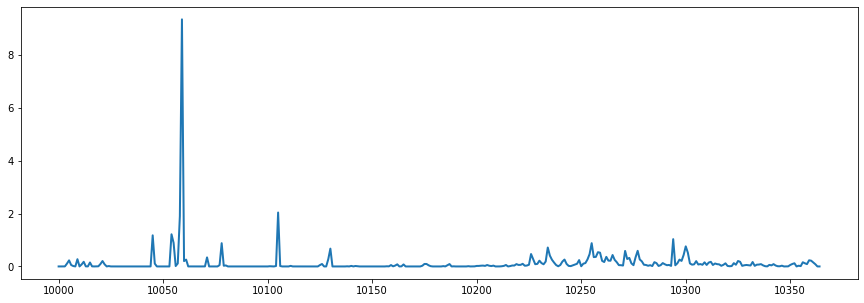

In [25]:
import matplotlib.pyplot as plt
import numpy as np
# plot
fig, ax = plt.subplots(figsize=(15,5))
x=np.arange(0, len(reanalysis_data.time.values), 1)
y=reanalysis_data.pr.values[:,2,1]

ax.plot(x, y, linewidth=2.0)
plt.show()

## 2. Download GCM SSP Scenario data

### 2.1 Set Temporal Resolution

<img src="../figures/CMIP6_1.PNG" width="1100">

In [ ]:
temporal_resolution = "daily"

### 2.2 Set Experiment "SSP3-7.0"

<img src="../figures/CMIP6_2.PNG" width="1100">

In [ ]:
experiment = 'ssp5_7_0'

### 1.3 Set Level

<img src="../figures/CMIP6_3.PNG" width="1100">

In [ ]:
level = "single_levels"     

### 1.4 Set Variable (example: precipitation)

<img src="../figures/CMIP6_4.PNG" width="1100">

In [ ]:
variable = 'precipitation',

### 1.5 Set Model (example: HadGEM3-GC31-MM(UK))

<img src="../figures/CMIP6_5.PNG" width="1100">

In [ ]:
model =  'hadgem3_gc31_mm'

### 1.6 Set Temporal subset: 2022-01-01 ~ 2100-12-31

 * Set "Temporal range"

<img src="../figures/CMIP6_6.PNG" width="1100">

### 7. Set Geographical Area (example: Pakistan - North:26, South:24, West:66, East:68)

<img src="../figures/CMIP6_7.PNG" width="1100">

In [ ]:
area = [26, 66, 24, 68, ]

In [ ]:
c.retrieve(
    'projections-cmip6',
    {
        'format': 'zip',
        'temporal_resolution': temporal_resolution,
        'experiment': experiment,
        'level': level,
        'variable': variable,
        'model': model,
        'date': '2022-01-01/2100-12-31',
        'area': area,
    },
    'pakistan_karachi_gcm_ssp5.zip')